In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

## Data block

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Feature Engineering 

In [3]:
train_data.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [4]:
test_data.head(2)

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...


In [5]:
train_data.isnull().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [6]:
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

In [11]:
train_data['comment_text'].value_counts().head()

Well said.                                                                                                                                                                                                                                                                                                                                                           184
No.                                                                                                                                                                                                                                                                                                                                                                  160
Exactly.                                                                                                                                                                                                                                                                              

In [14]:
print('% unique comments:', (train_data['comment_text'].nunique()/ train_data['comment_text'].shape[0])*100)

% unique comments: 98.66744160534198


In [18]:
train_comments = set(train_data['comment_text'].values)
test_comments = set(test_data['comment_text'].values)

#1170 unique comments from train data are in test data
len(train_comments.intersection(test_comments)), len(test_data.loc[test_data['comment_text'].isin(list(train_comments.intersection(test_comments)))])

(1170, 1522)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target distribution')

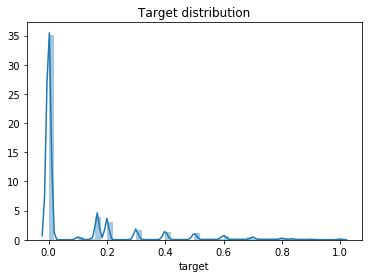

In [26]:
sns.distplot(train_data['target']).set_title('Target distribution')
plt.shop